In [ ]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import jax.random as jr
from jax.tree_util import Partial
from jax.scipy.sparse.linalg import cg as solve_cg

import graphgp as gp
import matplotlib.pyplot as plt

rng = jr.key(99)

# The Basics

In [16]:
# Ge
n_points = 100_000
rng, key = jr.split(rng)
points = jr.normal(key, (n_points, 2))
graph = gp.build_graph(points, n0=100, k=10)

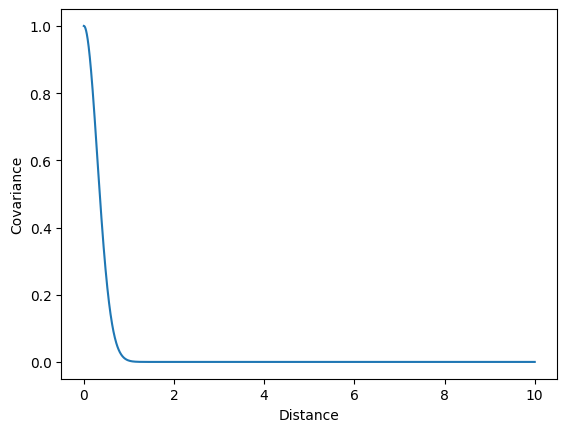

In [23]:
covariance = gp.extras.rbf_kernel(variance=1.0, scale=0.3, r_min=1e-4, r_max=10.0, n_bins=1000, jitter=1e-5)
plt.plot(*covariance)
plt.gca().set(xlabel='Distance', ylabel='Covariance')
plt.show()

In [24]:
rng, key = jr.split(rng)
xi = jr.normal(key, (n_points,))
values = gp.generate(graph, covariance, xi)
assert jnp.sum(jnp.isnan(values)) == 0, "Generated values contain NaNs"

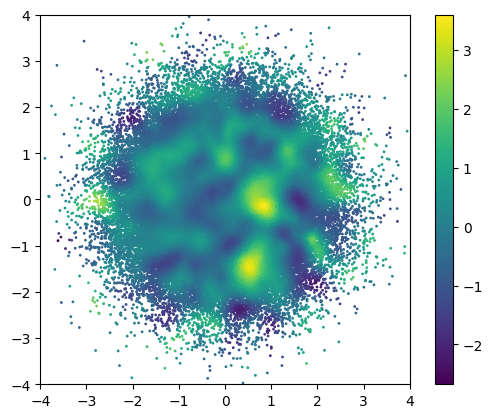

In [25]:
plt.scatter(*points.T, c=values, s=1)
plt.gca().set(aspect="equal", xlim=(-4, 4), ylim=(-4, 4))
plt.colorbar()
plt.show()


# Wiener filter



# Kernel learning

GraphGP provides an exact inverse and determinant, so we can do fun things like compute the maximum likelihood covariance kernel given the data. Recall the formula

$$P (\bold{d}|\Sigma) = \frac{1}{\sqrt{(2\pi)^k  \det\Sigma}}\,\, \exp\left(-\frac{1}{2} \bold{d}^T \Sigma^{-1} \bold{d} \right) $$

GraphGP approximates the Cholesky square root $L L^T=\Sigma$. We can directly evaluate the formula above and optimize for covariance parameters using gradient descent!

In [ ]:
import optax

# Graph construction

GraphGP provides a black-box graph construction algorithm which does a lot of heuristic work behind the scenes.

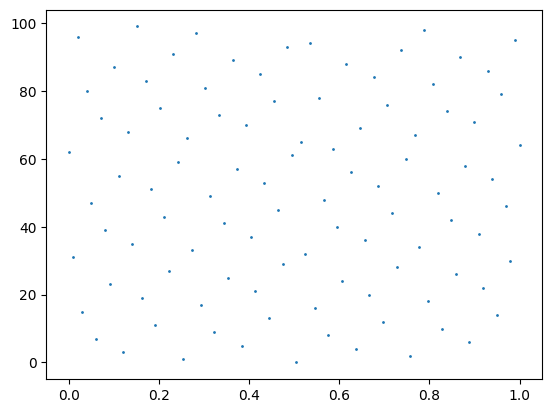

In [33]:
points = jnp.linspace(0, 1, 100)[:, None]
graph = gp.build_graph(points, n0=50, k=5)

plt.scatter(graph.points, jnp.arange(len(points)), s=1)